# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [201]:
# Importanto as bibliotecas
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [123]:
# Importando os dados
ideb = pd.read_csv('ideb.csv')
ideb.head(2)

,Unnamed: 0,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,0,2005,AC,1200054,municipal,fundamental,iniciais (1-5),64.1,0.645727,161.8,150.8,3.794003,2.4,NaN
1,1,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.8,165.6,4.177761,2.3,NaN


In [124]:
# Selecionando as colunas que serão utilizadas
ideb = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.8,2.4
1,2005,AC,53.9,167.8,165.6,2.3


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [128]:
# Número de linhas e colunas
print(ideb.shape)

print("- - - - - - - - - - - - - - - - - -")

# Dados faltantes
print(ideb.isna().sum())

(130194, 6)
- - - - - - - - - - - - - - - - - -
ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64


In [147]:
# Eliminando valores faltantes
ideb.dropna(inplace = True)
ideb.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.8,2.4
1,2005,AC,53.9,167.8,165.6,2.3


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [148]:
#HIPÓTESES
# H0: μ = 78
# H1: μ ≠ 78

#Criando novo dataframe com a coluna taxa_aprovacao e ano = 2005
ideb_2005 = ideb[ideb['ano'] == 2005].dropna()
ideb_2005.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.8,2.4
1,2005,AC,53.9,167.8,165.6,2.3


In [134]:
# Testando a hipótese de que a média da população é igual a 78
ttest_1samp(ideb_2005["taxa_aprovacao"], popmean=78)

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

#### Conclusão:
Valor-p é menor que 5% (nível de significância). Pode-se rejeitar H0

---

<br>


# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [107]:
#HIPÓTESES
# H0: μRS = μCE
# H1: μRS ≠ μCE

In [156]:
# Criando novo dataframe com ano = 2019
ideb_2019 = ideb[ideb['ano'] == 2019].dropna()

# Testando a hipótese de que no ano de 2019 a média do ideb do RS foi igual à média do CE, com um nível de significância de 5%
ttest_ind(ideb_2019[ideb_2019['sigla_uf'] == 'RS']['ideb'],
          ideb_2019[ideb_2019['sigla_uf'] == 'CE']['ideb'])

Ttest_indResult(statistic=-4.3200508719663135, pvalue=1.6632800256873896e-05)

#### Conclusão:
Valor-p é menor que o nível de significância. Pode-se rejeitar a hipótese nula de que a média de ideb no ano de 2019 foi igual para ambos os estados

---

<br> 


### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

<Axes: xlabel='sigla_uf', ylabel='ideb'>

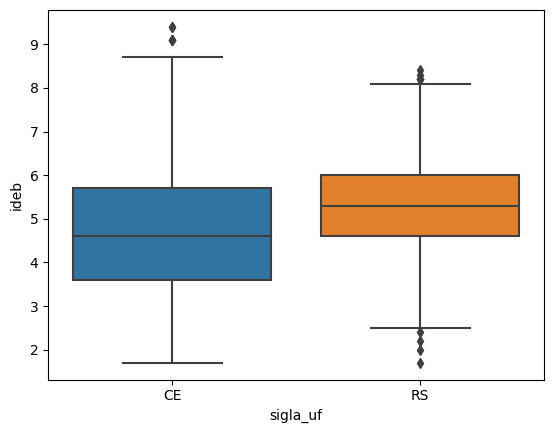

In [150]:
# Criando novo dataframe apenas com os dados do RS e do CE
ideb_RS_CE = ideb[(ideb['sigla_uf'] == 'RS') | (ideb['sigla_uf'] == 'CE')]
sns.boxplot(x = 'sigla_uf', y = 'ideb', data = ideb_RS_CE)

#### Conclusão
O estado do PR apresenta mediana mais alta e valores de ideb mais concentrados.

---

<br>


### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 ser igual. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [171]:
# Criando os dataframes para os anos de 2005 e 2019
ideb_2005 = ideb[ideb['ano'] == 2005].dropna().head(300)
ideb_2019 = ideb[ideb['ano'] == 2019].dropna().head(300)

# Concatenando os dataframes
ideb_2005_2019 = pd.concat([ideb_2005, ideb_2019])
ideb_2005_2019.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


In [168]:
# Testando a hipótese de que a média do ideb de 2005 é igual à média do ideb de 2019
ttest_rel(ideb_2005_2019[ideb_2005_2019['ano'] == 2005]['ideb'],
          ideb_2005_2019[ideb_2005_2019['ano'] == 2019]['ideb'])

TtestResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295, df=299)

#### Conclusão
Novamente, pode-se rejeitar a hipótese nula

---

<br>



### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

<Axes: xlabel='ano', ylabel='ideb'>

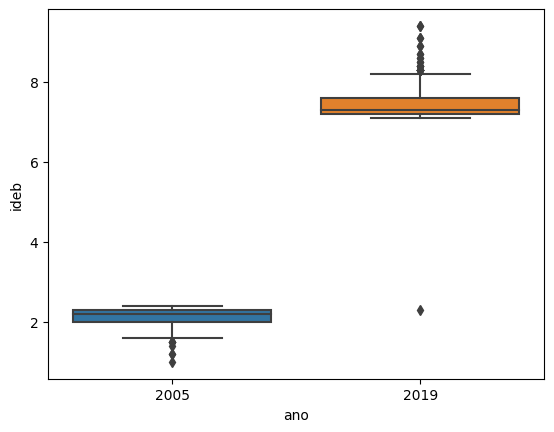

In [169]:
# Criando o boxplot
sns.boxplot(x = 'ano', y = 'ideb', data = ideb_2005_2019)

#### Interpretação
O ideb de 2019 aparenta ser significativamente mais alto que o de 2005

---

<br>


# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [193]:
# H0: μPR = μSC = μRS
# H1: μPR ≠ μSC ≠ μRS

# Criando os dataframes auxiliares
ideb_PR = ideb[ideb['sigla_uf'] == 'PR'].dropna()
ideb_SC = ideb[ideb['sigla_uf'] == 'SC'].dropna()
ideb_RS = ideb[ideb['sigla_uf'] == 'RS'].dropna()

In [194]:
# Aplicando o teste ANOVA para verificar se as médias são iguais
f_oneway(ideb_PR['ideb'], ideb_SC['ideb'], ideb_RS['ideb'])

F_onewayResult(statistic=25.712547138404776, pvalue=7.069515356057182e-12)

#### Conclusão
Valor-p < 0,05. Pode-se rejeitar a hipótese nula

---

<br>


### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

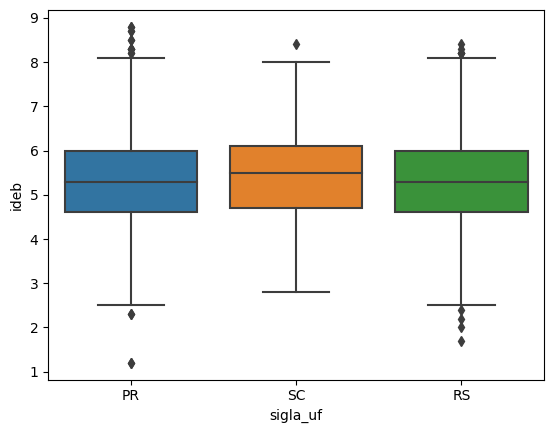

In [202]:
# Concatenando os dataframes
ideb_sul = pd.concat([ideb_PR, ideb_SC, ideb_RS])
ideb_sul.head()

#Gerando o boxplot
sns.boxplot(x = 'sigla_uf', y = 'ideb', data = ideb_sul);



### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [204]:
# q: how can I perform a tukey test on the data above?
# a: https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html

print(pairwise_tukeyhsd(endog=ideb_sul['ideb'], groups=ideb_sul['sigla_uf'], alpha=0.05))


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    PR     RS  -0.0212 0.4192 -0.0606 0.0183  False
    PR     SC   0.0994    0.0  0.0562 0.1425   True
    RS     SC   0.1205    0.0  0.0798 0.1613   True
---------------------------------------------------


#### Conclusão

Realmente, a média do estado de SC é diferente dos demais estados do Sul